In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv ('bmi.csv')
print(df.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
# Menghapus baris yang mengandung nilai NaN
df_cleaned = df.dropna()

In [5]:
# Pilih 100 baris pertama
df_cleaned = df.head(100)

# Simpan ke file baru jika perlu
df_cleaned.to_csv('path_to_reduced_dataset.csv', index=False)

In [6]:
# Mengonversi kolom 'gender' menjadi numerik
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

C:\Users\devon\AppData\Local\Temp\ipykernel_25456\2022754935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})


In [7]:
# Memilih fitur untuk clustering
X = df_cleaned[['Height', 'Weight', 'Gender']]

In [8]:
# Menghitung inertia untuk beberapa nilai k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

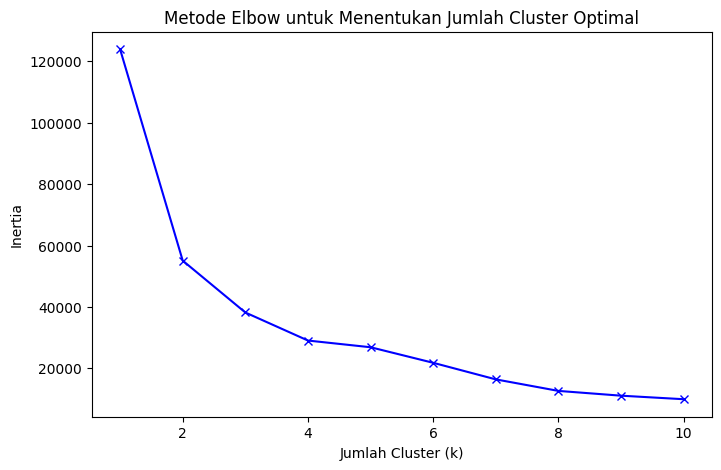

In [9]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()


In [23]:
# Melakukan clustering dengan K-means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X)

print(df.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


C:\Users\devon\AppData\Local\Temp\ipykernel_25456\2617721621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(X)


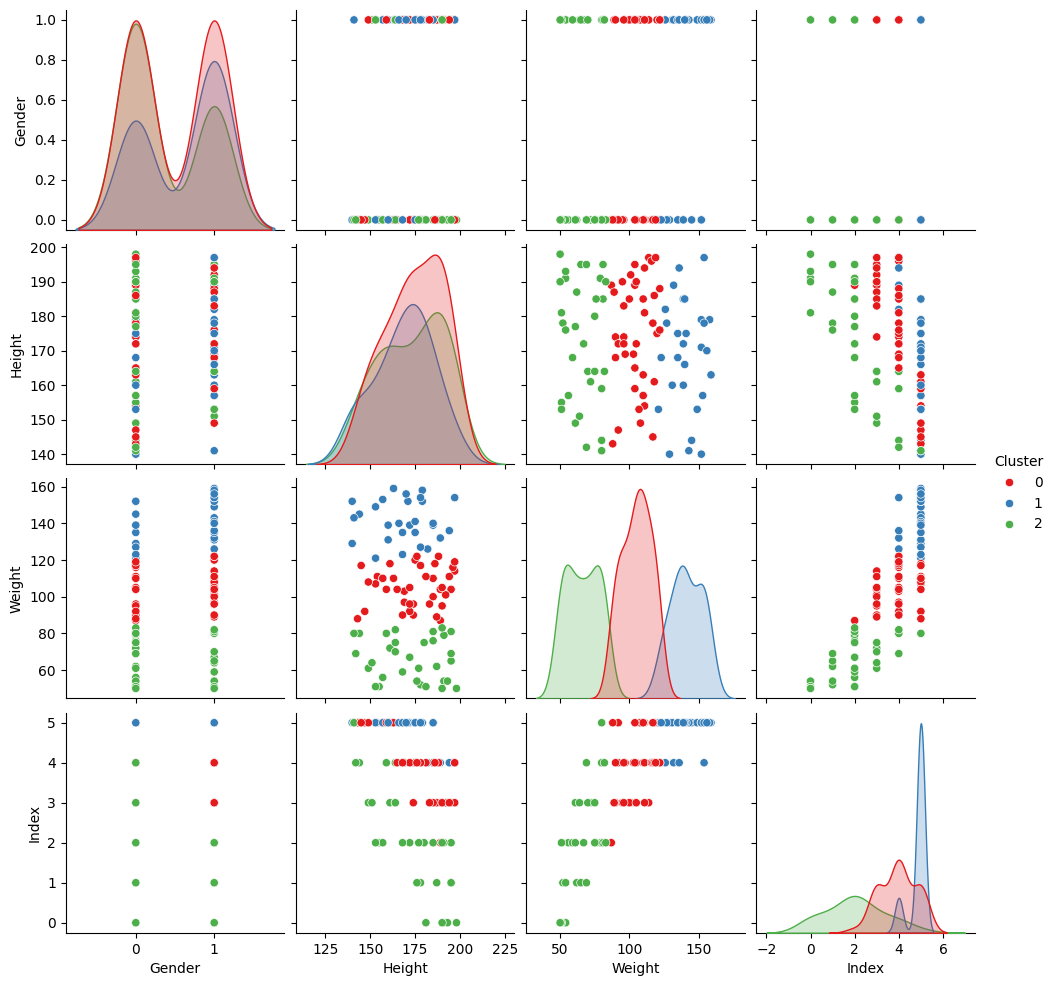

In [24]:
# Plot pairplot untuk melihat distribusi cluster
sns.pairplot(df_cleaned, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()

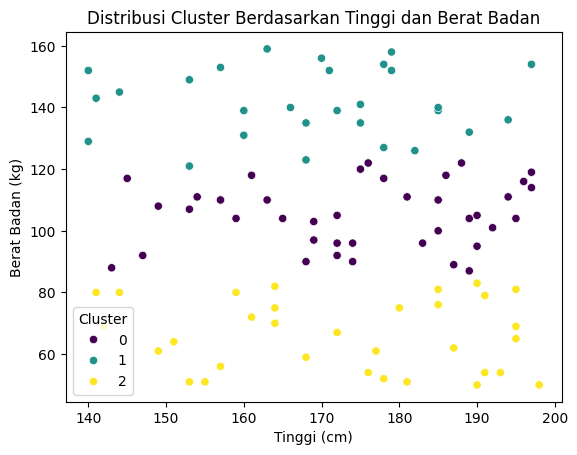

In [25]:
# Scatter plot untuk visualisasi cluster
sns.scatterplot(x='Height', y='Weight', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('Distribusi Cluster Berdasarkan Tinggi dan Berat Badan')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat Badan (kg)')
plt.legend(title='Cluster')
plt.show()